In [1]:
from zipfile import ZipFile
from PIL import Image
import sys
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import cv2

In [2]:
from skimage.feature import local_binary_pattern

def lbp_transform(x):
    radius = 2
    n_points = 8 * radius
    METHOD = 'uniform'

    imgUMat = np.uint8(np.array(x))

    lbp = local_binary_pattern(imgUMat, n_points, radius, method=METHOD)
    lbp = np.uint8(lbp)
    
    return lbp

In [3]:
from skimage.feature import hog

def hog_transform(x):
    imgUMat = np.uint8(np.array(x))
    
    gx = cv2.Sobel(imgUMat,cv2.CV_32F,1,0,ksize=3)
    gy = cv2.Sobel(imgUMat,cv2.CV_32F,0,1,ksize=3)

    mag, ang = cv2.cartToPolar(gx, gy)


    
#     _, mag = hog(imgUMat, orientations=9, pixels_per_cell=(8, 8), 
#                     cells_per_block=(2, 2), visualize=True, multichannel=False)
    
    hg = np.uint8(mag)
    
    return hg

In [4]:
def combine_lbp_hog(x):
    imgUMat = np.uint8(np.array(x))
    hg = hog_transform(x)
    lbp = lbp_transform(x)
    
#     print('gray: ', imgUMat)
#     print('hg: ', hg)
#     print('lbp: ', lbp)

#     print(lbp)
    
#     print()


    cimg = np.stack((imgUMat, hg, lbp), axis=2)
#     cimg = cimg / 3
    
    cimg = np.uint8(cimg)
    
    
#     cimg = (np.dstack((imgUMat, hg, lbp)) * 255.999) .astype(np.uint8)
    
    return cimg

In [5]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
#         transforms.Lambda(lbp_transform),
#         transforms.Lambda(hog_transform),
        transforms.Lambda(combine_lbp_hog),
#         transforms.ToPILImage(),
        # transforms.RandomSizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomVerticalFlip(),
#         transforms.RandomRotation(degrees=180),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

train_fer = datasets.ImageFolder(root='/tf/data/Quan/fer2013/data/train', transform=data_transform)
val_fer = datasets.ImageFolder(root='/tf/data/Quan/fer2013/data/val', transform=data_transform)
test_fer = datasets.ImageFolder(root='/tf/data/Quan/fer2013/data/test', transform=data_transform)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_fer,
                                             batch_size=1, shuffle=True,
                                             num_workers=8)
val_loader = torch.utils.data.DataLoader(val_fer,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)
test_loader = torch.utils.data.DataLoader(test_fer,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=8)

In [6]:
images, _ = next(iter(train_loader))
images.size()
# images = images.numpy()

torch.Size([1, 3, 48, 48])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-1.) tensor(1.) tensor(-0.3092)


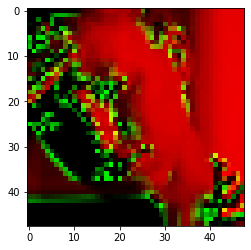

In [7]:


img = images[0]
print(img.min(), img.max(), img.mean())
plt.imshow(np.transpose(img, (1,2,0)))

In [49]:
img.mean(), img.max(), img.min()

(tensor(-0.3168), tensor(1.), tensor(-1.))

In [20]:
t.shape

(48, 48, 3)

In [28]:
t= np.stack((t[0], t[1], t[2]), axis=2)

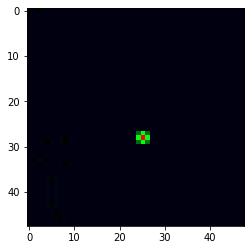

In [29]:
plt.imshow(t)

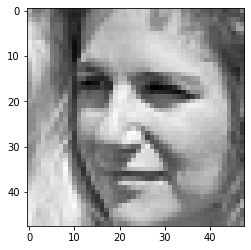

In [23]:
# img = images[-1]
plt.imshow(img[0, :, :], cmap='gray')
plt.show()

# from skimage.feature import local_binary_pattern
# lbp = local_binary_pattern(img[0],8,2,method='uniform')
# # histogram=scipy.stats.itemfreq(lbp_image)

# plt.imshow(lbp, cmap='gray')
# plt.show()

In [25]:
img

tensor([[[ 0.3569, -0.0510, -0.1059,  ..., -0.3176, -0.3333,  0.0118],
         [ 0.2157,  0.0510,  0.0431,  ..., -0.3882, -0.3961, -0.3176],
         [ 0.4118,  0.2471,  0.1294,  ..., -0.1373, -0.1922, -0.3333],
         ...,
         [ 0.7882,  0.6471,  0.4745,  ...,  0.2000, -0.0196, -0.2157],
         [ 0.8039,  0.6000,  0.5529,  ...,  0.1451, -0.1686, -0.0588],
         [ 0.7412,  0.6157,  0.5922,  ..., -0.0510, -0.1137,  0.0588]]])

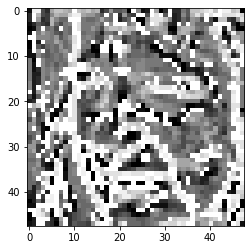

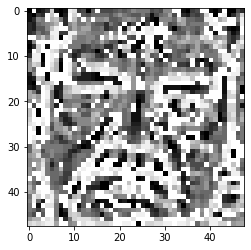

In [16]:
t = lbp_transform(img[0])
plt.imshow(t, cmap='gray')

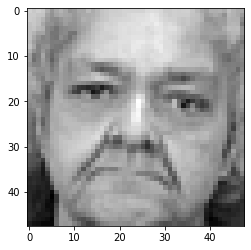

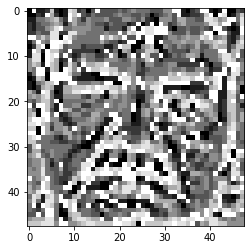

In [11]:
plt.imshow(img[0, :, :], cmap='gray')
plt.show()

from skimage.feature import local_binary_pattern
lbp = local_binary_pattern(img[0],8,2,method='uniform')
# histogram=scipy.stats.itemfreq(lbp_image)

plt.imshow(lbp, cmap='gray')
plt.show()

## HOG

In [115]:
import cv2

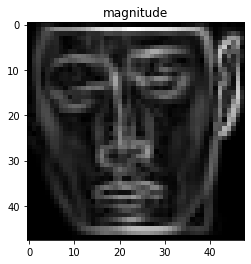

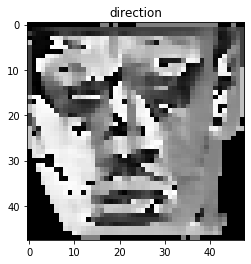

In [116]:
gx = cv2.Sobel(img[0],cv2.CV_64F,1,0,ksize=3)
gy = cv2.Sobel(img[0],cv2.CV_64F,0,1,ksize=3)

mag, ang = cv2.cartToPolar(gx, gy)

plt.imshow(mag, cmap='gray')
plt.title('magnitude')
plt.show()

plt.imshow(ang, cmap='gray')
plt.title('direction')
plt.show()

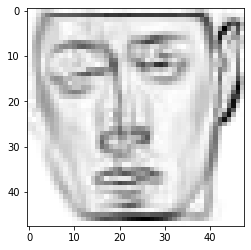

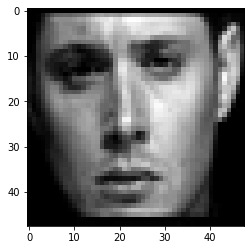

In [117]:
plt.imshow(mag*img[0], cmap='gray')
plt.show()
plt.imshow(img[0], cmap='gray')

In [118]:
mag

array([[0.        , 0.01568627, 0.14117646, ..., 0.04705882, 0.        ,
        0.        ],
       [0.        , 0.02480218, 0.2701047 , ..., 0.14798401, 0.08663028,
        0.07843137],
       [0.01568627, 0.07843137, 0.41174601, ..., 0.89404879, 0.6510276 ,
        0.2352941 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [119]:
img[0]

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -0.99215686, ..., -0.9843137 ,
        -0.9843137 , -0.9843137 ],
       [-1.        , -1.        , -0.99215686, ..., -0.9764706 ,
        -0.9764706 , -0.9843137 ],
       ...,
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]], dtype=float32)

In [120]:
lbp

array([[8., 8., 8., ..., 8., 8., 8.],
       [8., 8., 6., ..., 8., 8., 8.],
       [8., 8., 4., ..., 4., 6., 6.],
       ...,
       [8., 8., 8., ..., 8., 8., 8.],
       [8., 8., 8., ..., 8., 8., 8.],
       [8., 8., 8., ..., 8., 8., 8.]])

In [124]:
from skimage.feature import hog

fd, hog_image = hog(img[0], orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

TypeError: Invalid shape (900,) for image data

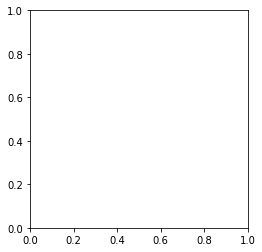

In [126]:
plt.imshow(fd)